# hierarchical clustering

In [6]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carguemos el data set
dataset = pd.read_csv("Mall_Customers.csv")


In [4]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
dataset.shape

(200, 5)

In [11]:
genero_mapeo={'Male':1, 'Female':2}

In [14]:

dataset['Gender']=dataset['Gender'].map(genero_mapeo)

In [15]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       2   20                  16                       6
3           4       2   23                  16                      77
4           5       2   31                  17                      40


In [16]:
# la siguiente linea lo que hace es obtener un resumen estadístico de nuestro Dataset.
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [17]:
# Identificar valores faltantes en nuestro dataset
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [19]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,2,20,16,6
3,4,2,23,16,77
4,5,2,31,17,40
...,...,...,...,...,...
195,196,2,35,120,79
196,197,2,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


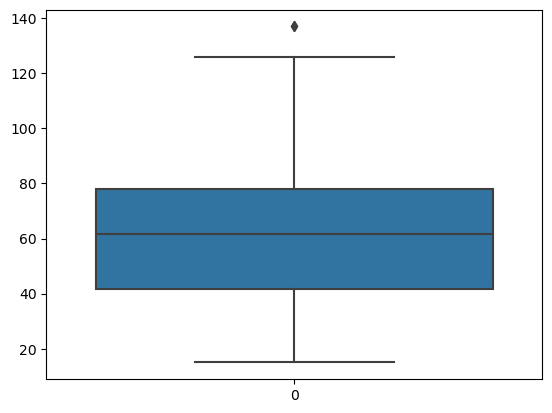

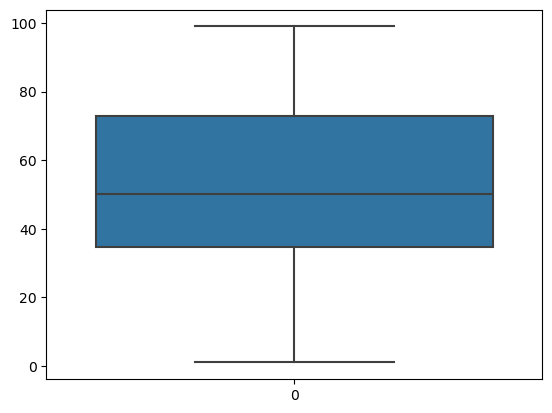

In [20]:
# Vamos a identificar valores atipicos en nuestro Data Set
sns.boxplot(data=dataset['Annual Income (k$)'])
plt.show()

sns.boxplot(data=dataset['Spending Score (1-100)'])
plt.show()

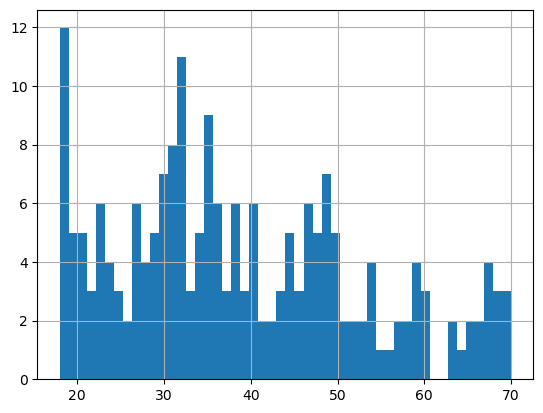

In [21]:
# Vamos a realizar un analisis de Distribución para la variable Age. 
dataset['Age'].hist(bins=50)
plt.show()

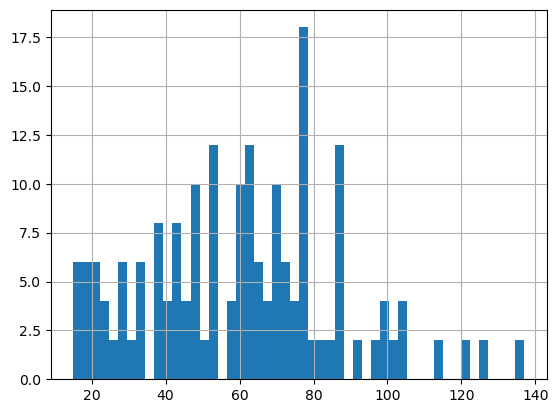

In [22]:
# Vamos a realizar un analisis de Distribución para la variable Annual Income
dataset['Annual Income (k$)'].hist(bins=50)
plt.show()

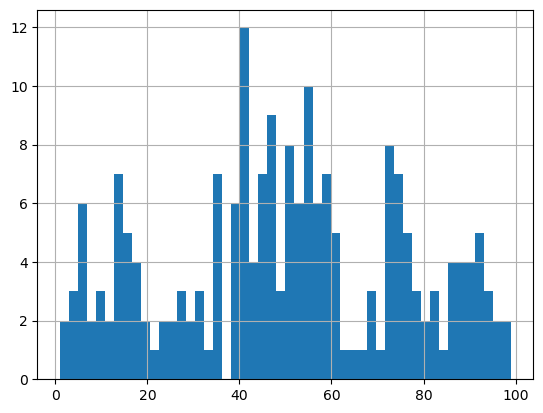

In [23]:
# Vamos a realizar un analisis de Distribución para la variable Spending Score
dataset['Spending Score (1-100)'].hist(bins=50)
plt.show()

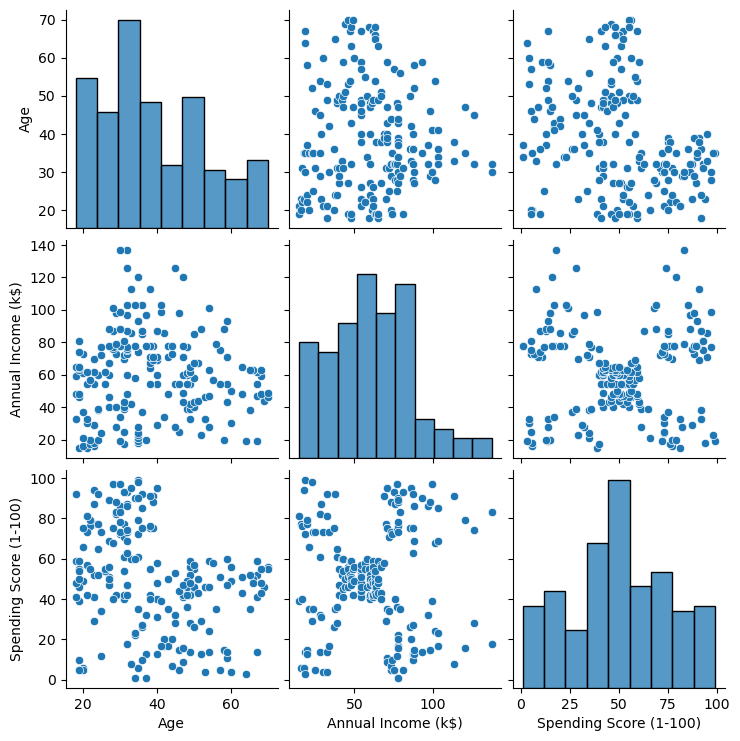

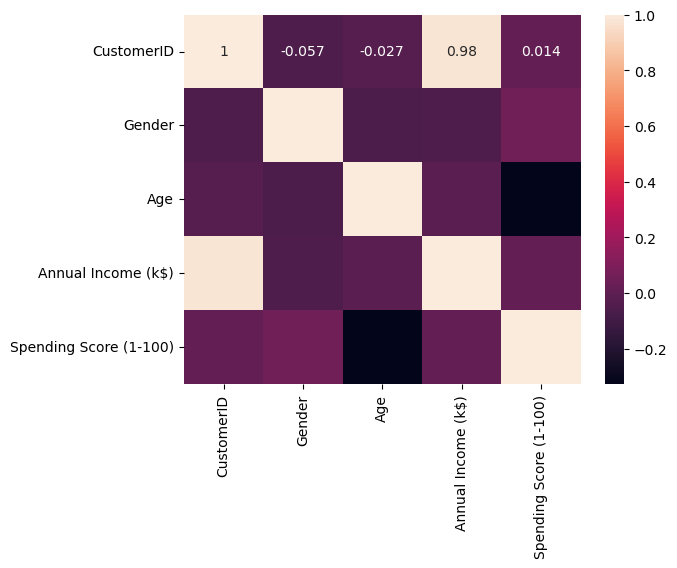

In [25]:
# Realizaremos un analisis de relaciones entre variables
sns.pairplot(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()
    
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

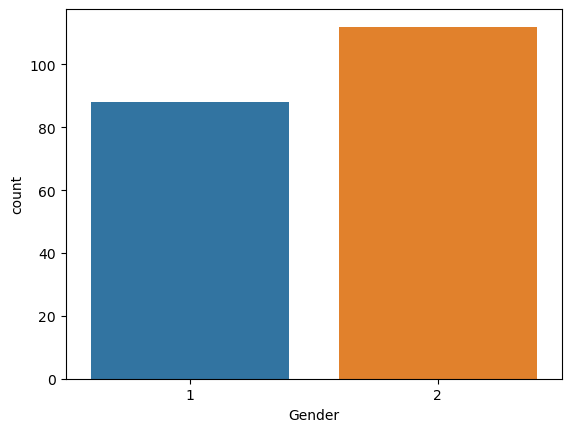

In [27]:
# realizaremos un analisis de Genero donde Male es 1 y Female 2 
sns.countplot(data=dataset, x='Gender')
plt.show()

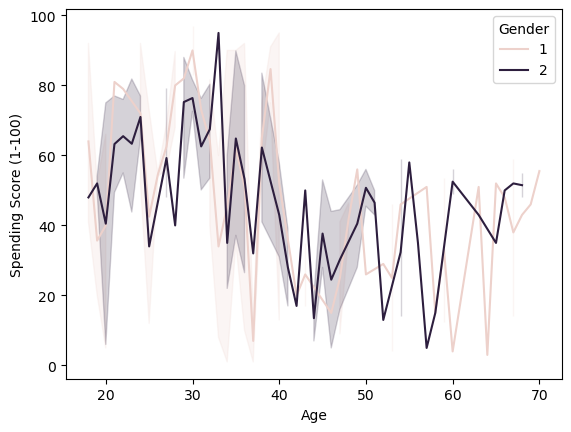

In [28]:
# Buscaremos tendencias y patrones 
sns.lineplot(data=dataset, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.show()

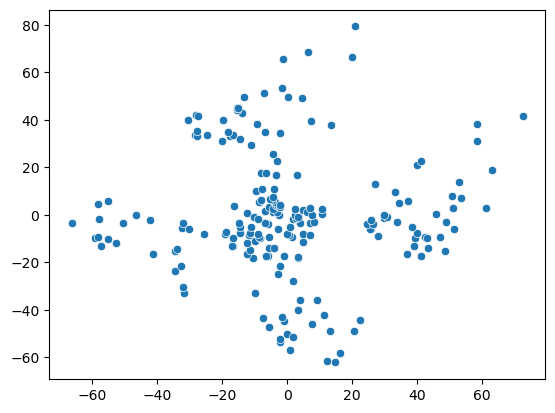

In [29]:
# Buscaremos valores atipicos multivariados 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']])
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1])
plt.show()

<Axes: >

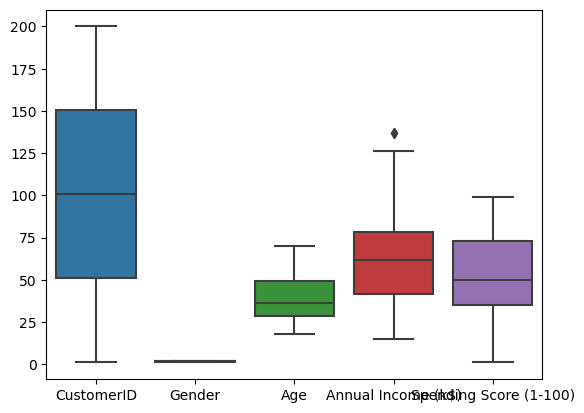

In [32]:
#Diagrama de caja para cada variable de especie
sns.boxplot(data=dataset)

In [35]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
X


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,0.886405,-0.276302,2.268791,1.118061
196,1.671450,0.886405,0.441365,2.497807,-0.861839
197,1.688771,-1.128152,-0.491602,2.497807,0.923953
198,1.706091,-1.128152,-0.491602,2.917671,-1.250054


# hierarchical Clustering

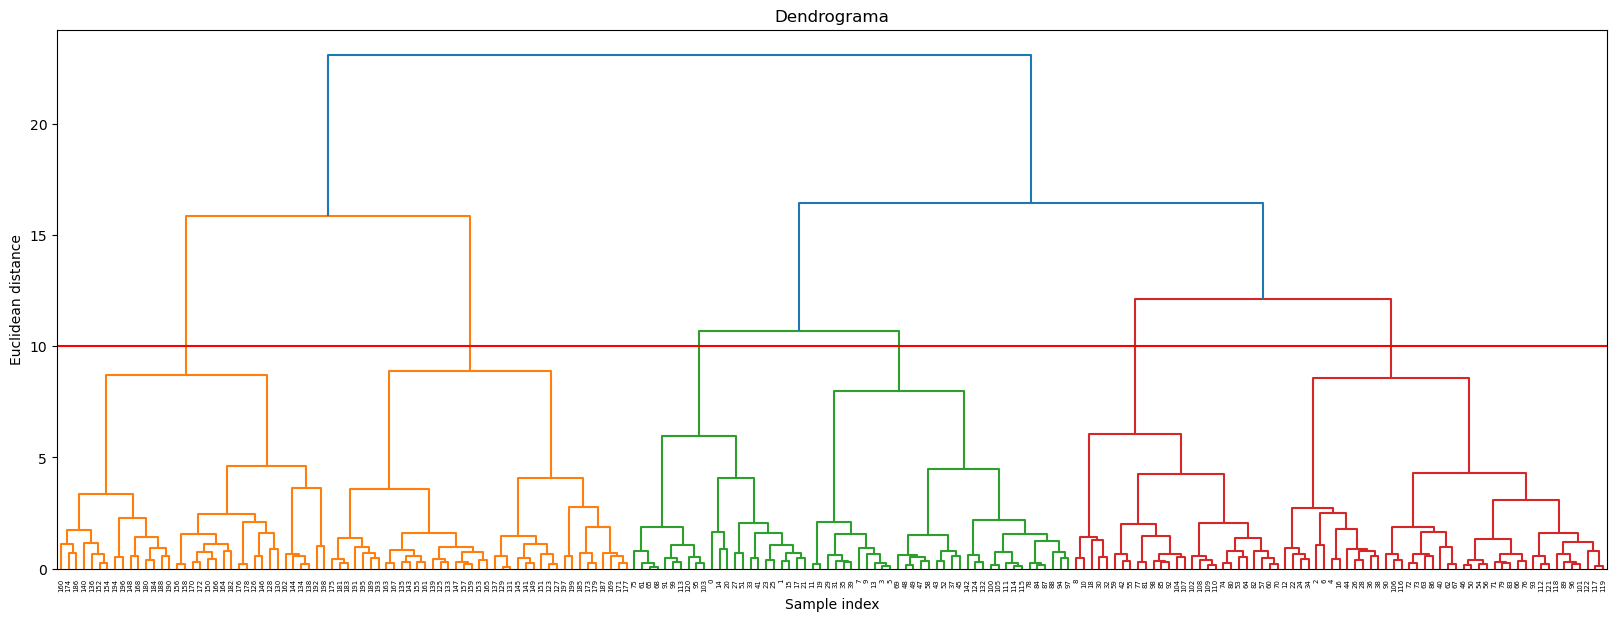

In [39]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [40]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [41]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

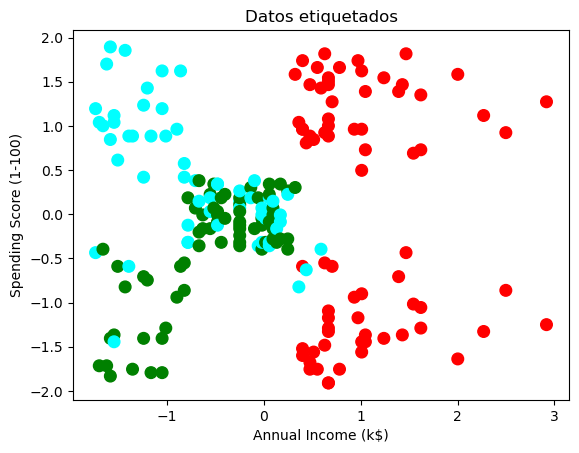

In [48]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [44]:
X.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [49]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

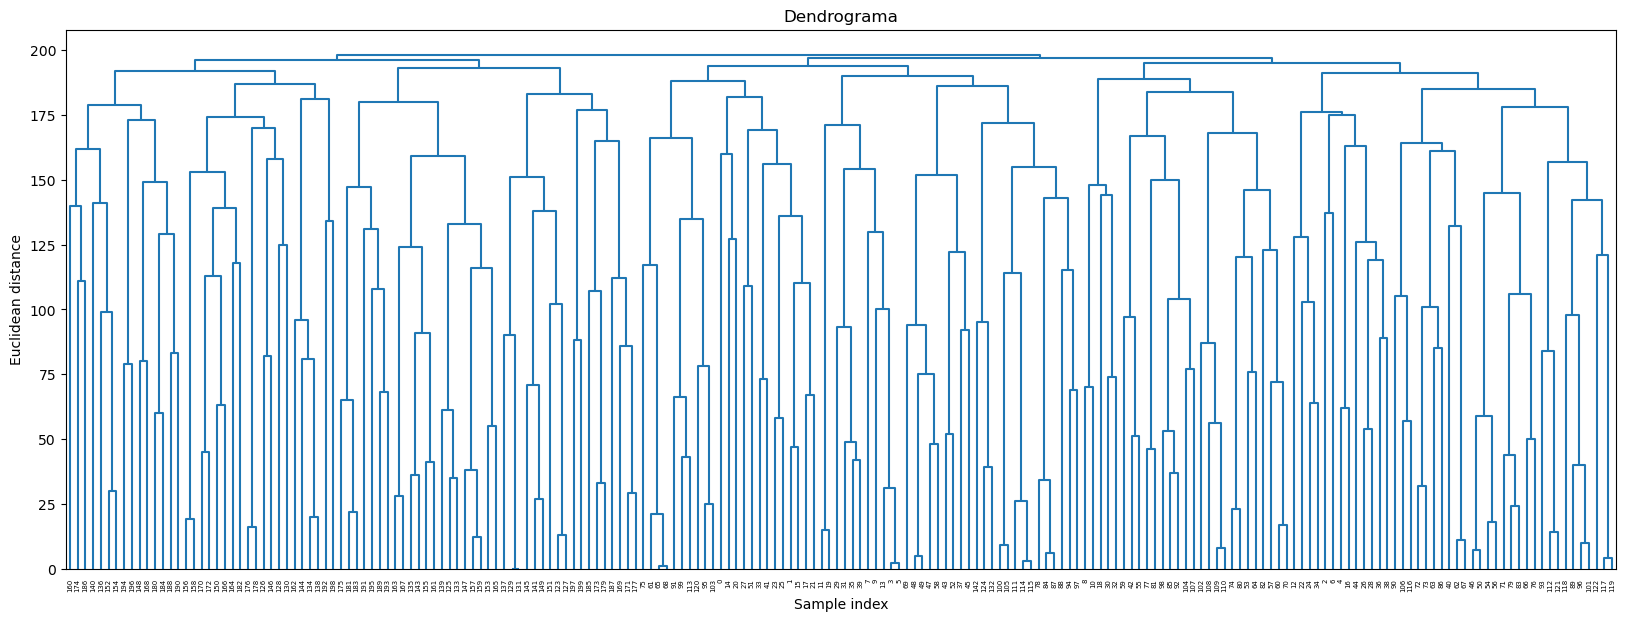

In [50]:
plot_dendrogram(hier_clustering, color_threshold=0)

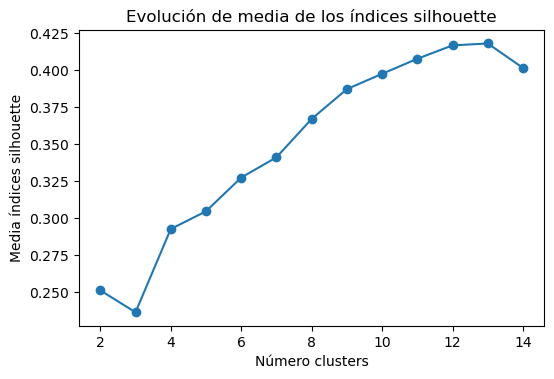

In [51]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [52]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.2363944459266719
Índice de Calinski-Harabasz: 66.01246683410993
Davies-Bouldin Index: 1.445010815576129


In [53]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6135110636355512, array([ 4.05770035, 16.44353185, 10.65959642, ..., 15.84831745,
        0.56583001, 15.84831745]))
